# **<center> Practical Implementations </center>**


## <center> Programming Session 1 - Credit Risk Prediction </center>
<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/Practical-Implementations-ENPC/">
    <img src="https://drive.google.com/uc?export=view&id=12t-JTO4co2ZDxqdmNOOZG104izf5bSye" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1raV0Rj4LL8EwNS_Xpg7ky-p3FZA8nk3X?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# Access files from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Outline

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-numerical-variables)
- [Finetuning a Supervised Model](#Finetuning-a-Supervised-Model)
  - [Evaluation Metrics](#Evaluation-Metrics)
  - [Fine Tuning Random Forest](#Fine-Tuning-Random-Forest)
- [Adjusting the threshold](#Adjusting-the-threshold)
  - [A small review](#A-small-review)
  - [Adjusting the probability threshold](#Adjusting-the-probability-threshold)

# 1. Exploring the dataset

* In this dataset, each entry represents a person who takes a credit by a bank.

* The target is: **loan_status** (0 or 1)
  * 1 in case of default.
  * 0 otherwise.
* It is a **binary classification problem**.

* The dataset is **highly imbalanced**.

* We would like to map the following features to the binary target.
  * **person_age** (numerical) refers to the age.
  *   **person_income** (numerical) refers to the annual income.
  *   **person_home_ownership** (categorical: 'MORTGAGE', 'RENT', 'OWN', 'OTHER').
  *   **person_emp_length** (numerical) refers to the employment length (in years).
  *   **loan_intent** (categorical: 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL') refers to the loan purpose.
  *   **loan_grade** (categorical: 'A', 'C', 'D', 'B', 'E', 'F','G').
  *   **loan_amnt** (numerical) refers to the loan amount.
  *   **loan_int_rate** (numerical) refers to the loan interest rate.
  *   **loan_percent_income** (numerical).
  *   **cb_person_default_on_file** (categorical: 'N', 'Y') refers to the historical default.
  *   **cb_person_cred_hist_length** (numerical) refers to the credit history length.

### 1.1 Loading the dataset

---
<font color=green>Q1:</font>
<br><font color='green'>
Import the basic libraries `pandas`, `numpy`, `seaborn`, `matplotlib`, `os` and `sklearn`
</font>

---


In [2]:
import os
import pandas as pd

---
<font color=green>Q2:</font>
<br><font color='green'>
Using `os.chdir(<path>)`, specify the path to your working directory
</font>

---


In [3]:
# Specify the path to your working directory
os.chdir("./gdrive/My Drive/Colab_Notebooks/2023/Session_1/")

In [5]:
!ls

credit_dataset.csv	     Solution_Programming_Session_1.ipynb
Programming_Session_1.ipynb  Solution_Programming_Session_1_section_1.ipynb


In [6]:
pd.read_csv("credit_dataset.csv")

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,31,95000,MORTGAGE,5.0,VENTURE,B,18000,11.71,0,0.19,N,9
32577,32577,29,158000,OWN,13.0,EDUCATION,A,11000,8.49,0,0.07,N,6
32578,32578,37,42000,RENT,0.0,MEDICAL,A,12000,10.99,0,0.29,N,13
32579,32579,25,60000,RENT,4.0,PERSONAL,A,9800,10.99,0,0.16,N,3


---
<font color=green>Q3:</font>
<br><font color='green'>
Using `pd.read_csv()`, load the dataset and name it `df`.
</font>

---


In [ ]:
import pandas as pd
url='https://drive.google.com/uc?id=1UcdSRp7CyqJq6RufXeIzQLEXVHGXPIO6'
df = pd.read_csv(url, index_col=0)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,31,95000,MORTGAGE,5.0,VENTURE,B,18000,11.71,0,0.19,N,9
32577,29,158000,OWN,13.0,EDUCATION,A,11000,8.49,0,0.07,N,6
32578,37,42000,RENT,0.0,MEDICAL,A,12000,10.99,0,0.29,N,13
32579,25,60000,RENT,4.0,PERSONAL,A,9800,10.99,0,0.16,N,3


---
<font color=green>Q4:</font>
<br><font color='green'>
Shuffle the rows of the dataset.
</font>

---

---
<font color=green>Q5:</font>
<br><font color='green'>
Display the 5 first rows of the dataset `df`.
</font>

---

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,29,60500,RENT,13.0,VENTURE,C,3000,13.61,0,0.05,N,9
1,28,43000,MORTGAGE,4.0,MEDICAL,A,13800,6.91,0,0.32,N,6
2,22,31200,RENT,1.0,EDUCATION,B,3200,11.99,0,0.10,N,4
3,21,50000,RENT,0.0,PERSONAL,B,12000,11.71,0,0.24,N,3
4,34,24000,RENT,0.0,EDUCATION,B,9000,11.14,1,0.38,N,8


---
<font color=green>Q6:</font>
<br><font color='green'>
Display the 5 last rows of the dataset `df`.
</font>

---

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,29,34000,RENT,6.0,DEBTCONSOLIDATION,D,8000,16.77,1,0.24,Y,10
32577,25,72000,MORTGAGE,7.0,MEDICAL,B,25000,11.89,0,0.35,N,2
32578,28,55000,OWN,7.0,VENTURE,A,20000,7.49,0,0.36,N,6
32579,23,31000,MORTGAGE,6.0,EDUCATION,B,18500,10.99,0,0.60,N,4
32580,35,28000,OWN,3.0,VENTURE,A,7600,6.62,0,0.27,N,10


---
<font color=green>Q7:</font>
<br><font color='green'>
Using `df.info()`, answer the following questions:
  * How many rows do we have in the dataset ?
  * Do we have missing values ?
</font>

---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


---
<font color=green>Q8:</font>
<br><font color='green'>
Create a list of the categorical variables named `catvars` and a list of numerical variables named `numvars`.
</font>

---

In [ ]:
#create quickaccess list with categorical variables labels

#create quickaccess list with numerical variables labels


---
<font color=green>Q9:</font>
<br><font color='green'>
Split your dataset into the training set (70% of the data) called `df_train` and the test set (30% of the data) named `df_test`, as described in the figure below.
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1ZbYtw7eU6KdGkIhLUfwsYFZWPMg61jer"></center>

In [ ]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22806 training samples
We have 9775 testing samples


### 1.2 Adding a new categorical feature

---
<font color=green>Q10:</font>
<br><font color='green'>
Show the sub-dataframe containing the numerical variables.
</font>

---

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,29,60500,13.0,3000,13.61,0.05,9
1,28,43000,4.0,13800,6.91,0.32,6
2,22,31200,1.0,3200,11.99,0.10,4
3,21,50000,0.0,12000,11.71,0.24,3
4,34,24000,0.0,9000,11.14,0.38,8
...,...,...,...,...,...,...,...
22801,25,93200,9.0,25000,15.58,0.27,4
22802,40,66000,25.0,6125,14.65,0.09,17
22803,25,58650,7.0,5600,14.84,0.08,4
22804,23,48000,1.0,2400,8.49,0.05,4


---
<font color=green>Q11:</font>
<br><font color='green'>
Using `df.describe()`, describe the distribution of the numerical features.
</font>

---

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22806.000000,2.280600e+04,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000
mean,27.717706,6.599546e+04,4.772341,9586.899281,11.006900,0.170550,5.795931
std,6.361853,5.439696e+04,4.123802,6316.353379,3.075389,0.107361,4.078652
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.856800e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12000.000000,13.110000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


count    2.280600e+04
mean     6.599546e+04
std      5.439696e+04
min      4.000000e+03
25%      3.856800e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

---
<font color=green>Q12:</font>
<br><font color='green'>
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 38568], then `category_income = 'D'`.
  * If `person_income` is in [38568, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79200], then `category_income = 'B'`.
  * If `person_income` is in [79200, +$\infty$], then `category_income = 'A'`.
</font>

---

In [ ]:
# for i in range(len(df_train)):
#   if df_train.loc[i, "person_income"] < 38568:
#     df_train.loc[i, "category_income"] = "D"
#   elif df_train.loc[i, "person_income"] < 55000:
#     df_train.loc[i, "category_income"] = "C"
#   elif df_train.loc[i, "person_income"] < 79200:
#     df_train.loc[i, "category_income"] = "B"
#   else:
#     df_train.loc[i, "category_income"] = "A"

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,29,60500,RENT,13.0,VENTURE,C,3000,13.61,0,0.05,N,9,B
1,28,43000,MORTGAGE,4.0,MEDICAL,A,13800,6.91,0,0.32,N,6,C
2,22,31200,RENT,1.0,EDUCATION,B,3200,11.99,0,0.10,N,4,D
3,21,50000,RENT,0.0,PERSONAL,B,12000,11.71,0,0.24,N,3,C
4,34,24000,RENT,0.0,EDUCATION,B,9000,11.14,1,0.38,N,8,D


---
<font color=green>Q13:</font>
<br><font color='green'>
Add the new category `category_income` to the list of categorical variables `catvars`.
</font>

---

# 2. Visualization

### 2.1 Count plot for a categorical variable.

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.



---
<font color=green>Q14:</font>
<br><font color='green'>
Using `seaborn.countplot`, display the **count plot** of the categorical variable `'person_home_ownership'` (where you separate the counts according to the targets 0/1).
</font>

---

In [ ]:
# The different values of person_home_ownsership


array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

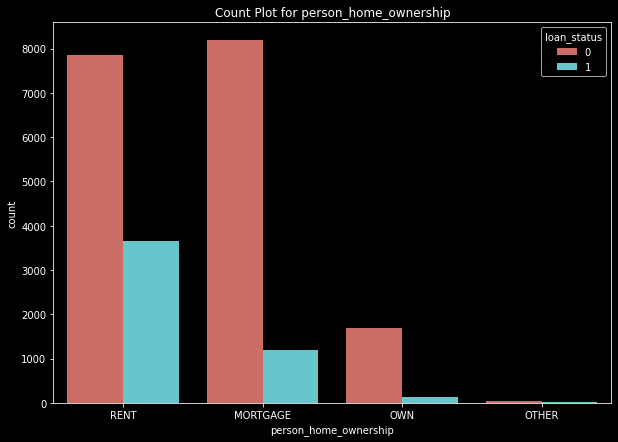

### 2.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "0" and "1" targets.

---
<font color=green>Q15:</font>
<br><font color='green'>
Using `seaborn.distplot`, display the distribution of the `person_income` numerical variable for the "0" and "1" targets.
</font>

---

6        66300
9        32400
10       49000
13       49000
15       45600
         ...  
22791    31000
22793    56100
22794    59000
22799    78000
22804    58650
Name: person_income, Length: 4918, dtype: int64

0        60500
1        43000
2        31200
3        50000
7        49000
         ...  
22800    35000
22801    93200
22802    66000
22804    48000
22805    47500
Name: person_income, Length: 17780, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


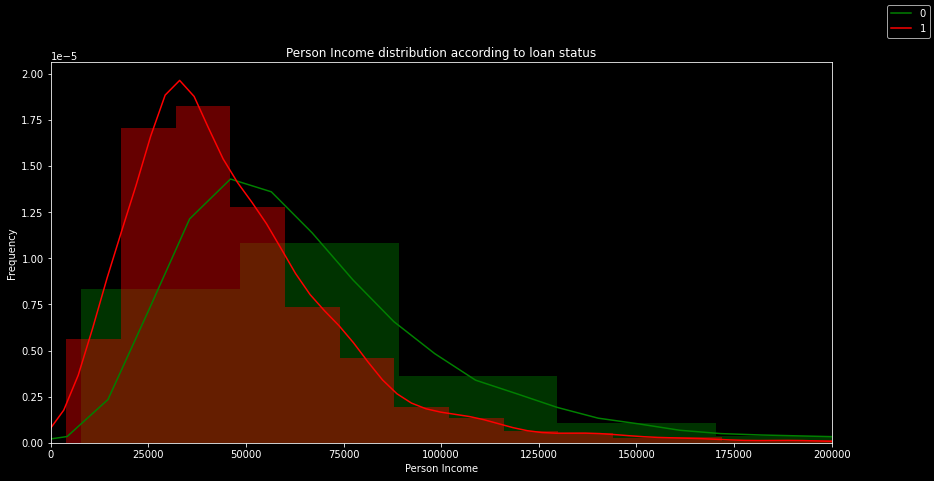

---
<font color=green>Q16:</font>
<br><font color='green'>
What can you say about these distributions ?
</font>

---

### 2.3 Boxplots

Now, we want to show the distribution of a numerical variable for all the values of a categorical variable.

To that end, we use box plots:

Boxplots display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* **median (Q2/50th Percentile)**: the middle value of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **maximum**: Q3 + 1.5*IQR
* **minimum**: Q1 -1.5*IQR

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1g3G3I6msJQ4iNXUUr_Z5cZAji14Dj5lk"></center>


---
<font color=green>Q17:</font>
<br><font color='green'>
Using `seaborn.boxplot`, describe the distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`.
</font>

---

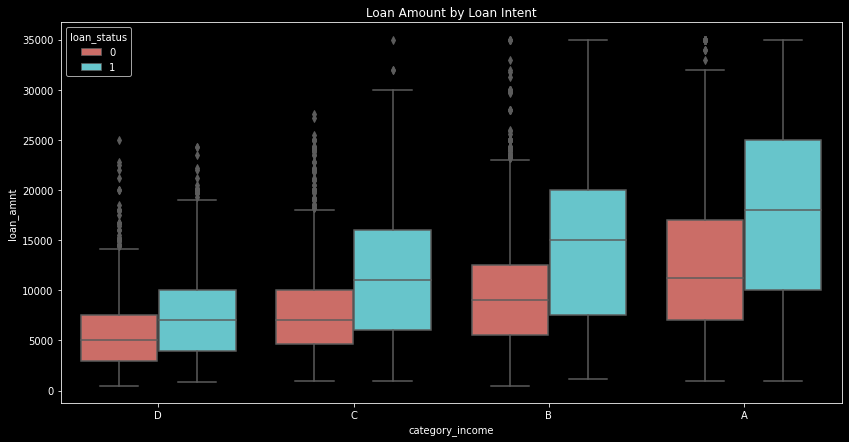

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere.

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features.

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

<center><img width="800" src = "https://drive.google.com/uc?export=view&id=1-WOjGo6OFQ0Cuq4mAmZ8oh6T2D6Y1gVL"></center>

---
<font color=green>Q18:</font>
<br><font color='green'>
For each categorical variable, pring the names of the different categories and their number.
</font>

---

The categories:

Categorical Variable: **person_home_ownership**.. Categories: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Categorical Variable: **loan_intent**.. Categories: ['VENTURE' 'MEDICAL' 'EDUCATION' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Categorical Variable: **loan_grade**.. Categories: ['C' 'A' 'B' 'D' 'E' 'F' 'G']
Categorical Variable: **cb_person_default_on_file**.. Categories: ['N' 'Y']
Categorical Variable: **category_income**.. Categories: ['B', 'C', 'D', 'A', NaN]
Categories (4, object): ['D' < 'C' < 'B' < 'A']


---
<font color=green>Q19:</font>
<br><font color='green'>
For each of the categorical variables, what is the number of possible values ?
</font>

---

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

---
<font color=green>Q20:</font>
<br><font color='green'>
Print the shape of `df_train` before One Hot Encoding.
</font>

---

In [ ]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables


(22806, 13)

---
<font color=green>Q21:</font>
<br><font color='green'>
Using `pandas.get_dummies` or `sklearn.preprocessing.OneHotEncoder`, transform each categorical variable (with K categories) into K-1 new feature columns.
</font>

---

---
<font color=green>Q22:</font>
<br><font color='green'>
Explain the new shape of `df_train` after the one hot encoding ?
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1eEOIb904c2UOT82AUYdjaZINj9rVr1Ji"></center>

In [ ]:
# df_train shape


(22806, 26)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7.

* One column for the target `loan_status`.

* Total number of columns: 26
---

### 3.2 Preprocessing Numerical Variables

---
<font color=green>Q23:</font>
<br><font color='green'>
Split `df_train` into `df_train_features` and `df_train_targets` and `df_test` into `df_test_features` and `df_test_targets` as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1V0Sjgbbef6mdNSAwKAUQLeJlOWJU-3np"></center>

---
<font color=green>Q24:</font>
<br><font color='green'>
Split each of `df_train_features` and `df_test_features` as shown in the figure below:

* `df_train_features_numvars` and `df_test_features_numvars` containing the training abd testing numerical features
* `df_train_features_rest` and `df_train_features_rest` containing the rest of the features.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1loF_Uk967CSVlGKikXWbDxwpKAEGaDlg"></center>

---
<font color=green>Q25:</font>
<br><font color='green'>
Plot the histograms of the numerical variables `df_train_features_numvars` using `dataframe.hist()`
</font>

---

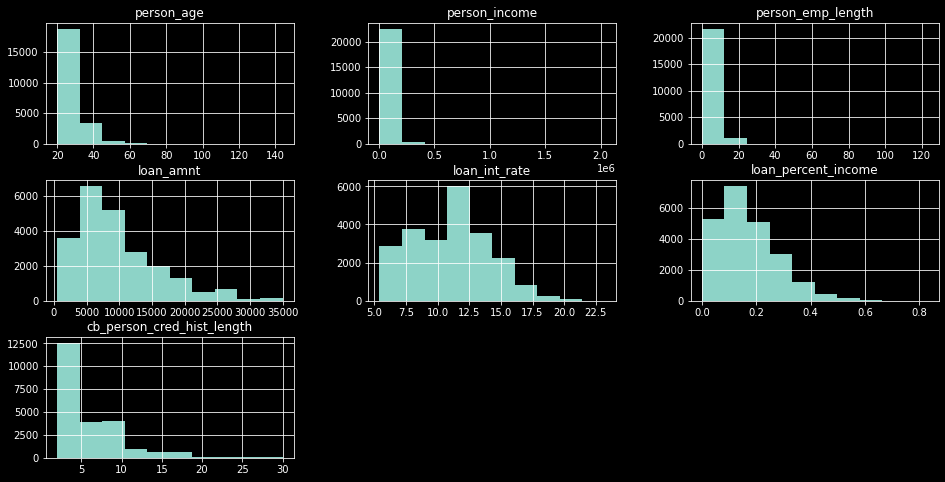

There are two ways of scaling a numerical variable:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---
<font color=green>Q26:</font>
<br><font color='green'>
From `sklearn.preprocessing`, scale the numerical features using one of the two scaling methods:
  * `StandardScaler()` to get a distribution with a mean = 0 and std = 1.
  * `MinMaxScaler()` to map the data to the range [0, 1]
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1b2nPF0z0eMVwvH3g5Yu40AtKaQHFlMUa"></center>

---
<font color=green>Q27:</font>
<br><font color='green'>
Plot the histograms of the numerical features after the scaling process.
</font>

---

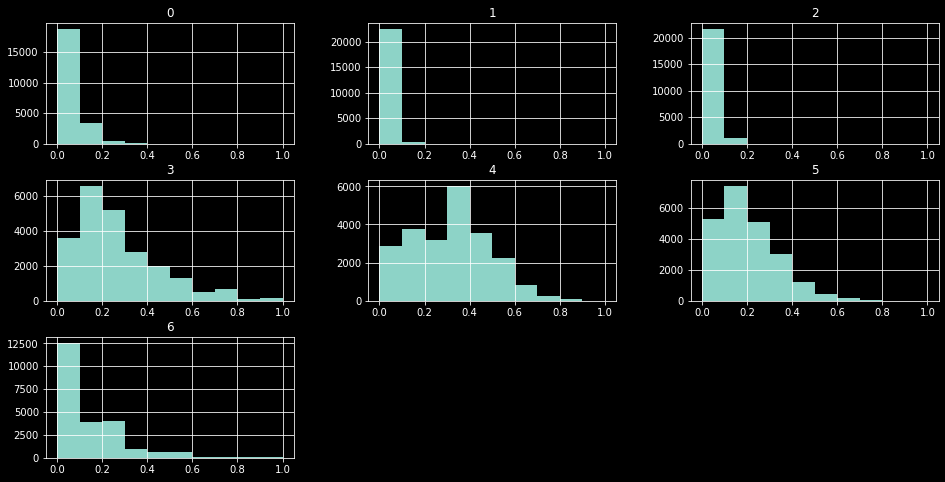

---
<font color=green>Q28:</font>
<br><font color='green'>
Concatenate `df_train_features_rest` with your scaled dataframe of numerical features `df_train_features_numvars_std` to get the final dataframe `df_train_features_processed`. Same for the test data as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1VgznTzwgu32QTb6bjxdDzvu8gF5PyEvt"></center>

---
<font color=green>Q29:</font>
<br><font color='green'>
Show the first 5 rows of the new dataset
</font>

---

,0,1,2,3,4,5,6,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,category_income_C,category_income_B,category_income_A
0,1.616278,0.147154,1.025207,-0.092919,0.596068,-0.470856,2.256695,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,-0.584388,1.948765,0.297707,1.648630,0.800925,-0.470856,-0.440334,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,-0.741578,0.092076,0.782707,1.648630,1.002529,1.019482,-0.685519,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0.673135,-0.161841,0.055207,-0.504558,-0.977752,-0.564003,-0.195150,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-0.270007,0.165538,-1.157292,0.382049,-0.203849,-0.098272,-0.685519,0,0,1,...,1,0,0,0,0,0,0,0,1,0


---
<font color=green>Q30:</font>
<br><font color='green'>
What are the shapes of `df_train_features_processed`, `df_train_targets`, `df_test_features_processed` and `df_test_targets`
</font>

---

(22806, 25)

(22806,)

(9775, 25)

(9775,)

---
<font color=green>Q31:</font>
<br><font color='green'>
Convert the aforementioned dataframes into `numpy` arrays to get `X_train`, `X_test`, `y_train`, `y_test`.
</font>

---

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1SbB_CEcOCblu1sUwzGAOwn5oQRQGEQxS"></center>

The F1 score is calculated as follows:

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

---
<font color=green>Q32:</font>
<br><font color='green'>
What is the distribution of the targets `loan_status` ?
</font>

---

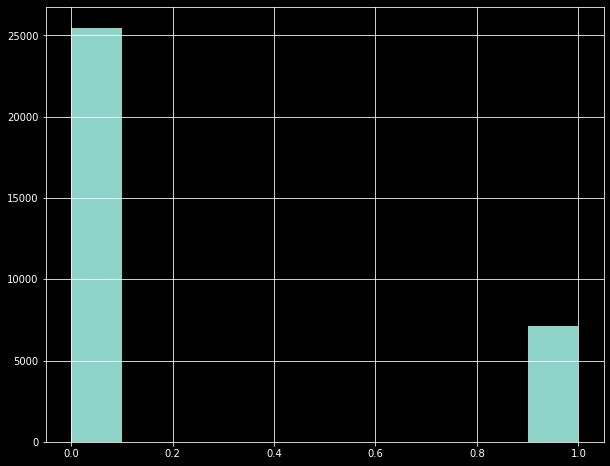

---
<font color=green>Q33:</font>
<br><font color='green'>
Which of the two errors is the most dangerous one for the credit problem ?
</font>

---

---
The dataset is imbalanced, we should avoid optimizing the **accuracy score**.

The worst error is to predict a negative class (no default) to a sample that is actually in the positive class (i.e default).

Therefore, the metric we should optimize is the recall.

---

A brief review of Cross Validation:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1TQfP49ZaOoAq4Egt0NuIsWYLHb8Maris"></center>

---
<font color=green>Q34:</font>
<br><font color='green'>
Using `cross_val_score` from `sklearn.model_selection`, write a function that takes as inputs the **classifier**, the **training features** and the **training targets**. The function should output the distribution (the mean and the std) of the following performance measures using cross validation (with K=5).

* Presicion
* Recall
* f1 score
* auc
* accuracy
</font>

---

---
<font color=green>Q35:</font>
<br><font color='green'>
Using `confusion_matrix` from `sklearn.metrics`, write a function that takes as inputs `y_test` and `y_hat` (vector of 0-1). The function should output a plot of the confusion matrix on the test set.
</font>

---

### 4.2 Fine Tuning Random Forest

Brief review of Hyperparameters Optimization:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1j93wPCK9TyV0oi_kj-UhijNJTLafH4fa"></center>

We would like to tune the following hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* bootstrap = method for sampling data points (with or without replacement)

---
<font color=green>Q36:</font>
<br><font color='green'>
Define a dictionary called `random_grid` which maps each of the hyperparameters to a list of possibilities. Example:
* "n_estimators" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
* "max_features" : ["auto", "sqrt"]
* "max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
* "bootstrap" : [True, False]
</font>

---

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


---
<font color=green>Q37:</font>
<br><font color='green'>
Using `RandomizedSearchCV` from `sklearn.model_selection` and `RandomForestClassifier` from `sklearn.ensemble`, find the best combination of hyperparameters among 20 possibilities.

</font>

---

In [ ]:
# Import Modules


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, verbose=2)

---
<font color=green>Q38:</font>
<br><font color='green'>
What are the hyperparameters of the best model `rf_best`?

</font>

---

RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=42)

---
<font color=green>Q39:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`.
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7680
           1       0.96      0.72      0.82      2094

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.94      0.93      0.93      9774



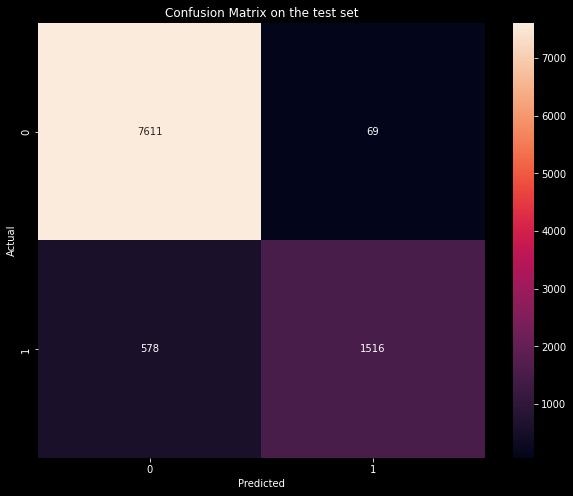

In [ ]:
# Evaluation performances

# Confusion Matrix


# 5. Adjusting the threshold

### 5.1 A small review



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis.

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$.


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores:
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$

* The figure below summarizes the process described.

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions.

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://colab.research.google.com/drive/1gcbB3-3Y6AfohDFJYKmFPF2G-4EIPDTi?usp=sharing)).




* The method `rf_best.predict_proba()` maps each element $x$ to a prediction (or a score) $p(x) \in [0, 1]$ reflecting the confidence of the classifier in assigning the target $y=1$ to the feature vector $x$.


<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


* In order to convert the continuous prediciton $p(x)$ into a binary prediction $\hat{y} \in \{0, 1 \}$, we need to choose a **threshold** above which we assign the positive label.

* The default threshold is 0.5 and the method used to map $x$ to a binary output with this default threshold 0.5 is `rf_best.predict()`

### 5.2 Adjusting the probability threshold

**Our objective in this section is to adjust the threshold in order to match a desired recall**

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

---
<font color=green>Q40:</font>
<br><font color='green'>
Plot the ROC curve of the best model `rf_best` using `BinaryClassification` from `plot_metric.functions`
</font>

---


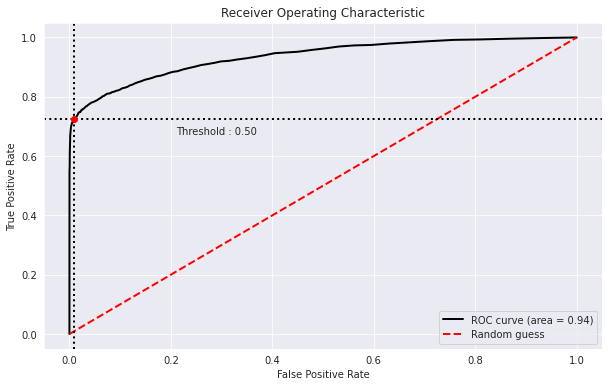

In [ ]:
# Import module

# Plot the ROC curve


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7680
           1       0.96      0.72      0.82      2094

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.94      0.93      0.93      9774



---
<font color=green>Q41:</font>
<br><font color='green'>
Let us fix an objective recall of 0.8. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.8, called `best_threshold`
</font>

---


The best Threshold is 0.27...The best recall is 0.8013371537726839


---
<font color=green>Q42:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)).
</font>

---

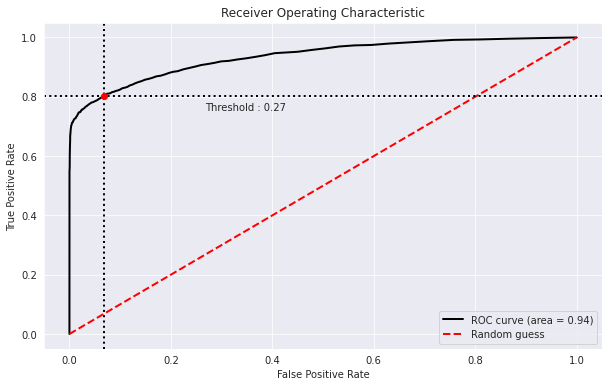

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve


---
<font color=green>Q43:</font>
<br><font color='green'>
Plot the confusion matrix associated with `best_threshold`
</font>

---


In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test


In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th


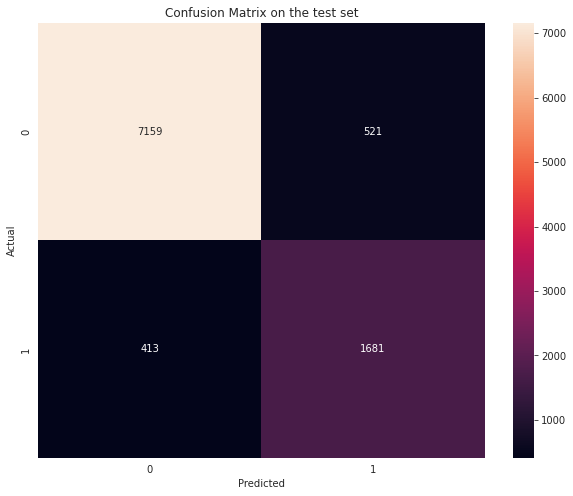

In [ ]:
# plot the confusion matrix


---
<font color=green>Q44:</font>
<br><font color='green'>
Print the evaluation metrics associated with `best_threshold`
</font>

---


In [ ]:
# print the classification report


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7680
           1       0.76      0.80      0.78      2094

    accuracy                           0.90      9774
   macro avg       0.85      0.87      0.86      9774
weighted avg       0.91      0.90      0.91      9774



# Wrap-up

During this session we learned:
* How to load and visualize a dataset.
* How to process categorical and numerical features.
* What are the most suitable evaluation metrics in the case of an imbalanced dataset, especially the recall and the AUC.
* How to adjust the probability threshold so that it matches the objective error of a business problem.

# Optional Exercise: Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class.

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$.
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$.

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Optional questions:</font>
<br><font color='green'>
* Finetune the model after using the SMOTE oversampling method.
* Try different supervised models to improve the results.
</font>

---


## Contact

If you have any question regarding this notebook, do not hesitate to contact: mlpi.enpc@gmail.com


